In [50]:
## IMPORTACIÓN GENERAL DE LIBRERIAS Y VISUALIZACIÓN DE DATOS (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT
import warnings
import sys

from langdetect import detect
from wordcloud import WordCloud 

%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('default') 
sns.set(style="whitegrid") 
plt.rcParams['figure.figsize'] = (18, 18)

np.set_printoptions(threshold=sys.maxsize)

In [51]:
#Leemos el CSV
datos = pd.read_csv('../data/train.csv')

In [52]:
def filtrarPalabras(miArray):
    variable = ''
    for key in miArray:
         if '#' in str(key):
            variable = variable + ' ' + str(key)
    return variable

In [53]:
datos.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [54]:
datos['text'] = datos['text'].str.lower()
datos['counts'] = datos['text'].str.len()
datos['totalwords'] = datos['text'].str.split().str.len()
datos['words'] = datos.text.str.strip().str.split()

In [55]:
selected_words_singular=['fire','flood','inundate','earthquake','quake','deluge','euption','twister','tornado','hurricane', 'landslide','typhoon','wildfire','forest fire','drought','avalanche','urgent','important','danger','warrning','help','evacuation']
selected_words_plural=['fires','floods', 'earthquakes','quakes','deluges','rashes','tornadoes','hurricanes', 'landslides','typhoons','wildfires','forest fires','droughts','avalanches']
selected_words_other=['heat wave','died','flooding','flooded','damage','urgent','important','danger','warrning','help','evacuation']
selected_words = selected_words_singular + selected_words_plural + selected_words_other
s = set(selected_words)

In [56]:
datos = datos.assign(hashtags=[filtrarPalabras(el) for el in datos.words])
datos = datos.assign(matches=[len(set(el) & s) for el in datos.words])
datos.head()

,id,keyword,location,text,target,counts,totalwords,words,hashtags,matches
0,1,NaN,NaN,our deeds are the reason of this #earthquake may allah forgive us all,1,69,13,"[our, deeds, are, the, reason, of, this, #earthquake, may, allah, forgive, us, all]",#earthquake,0
1,4,NaN,NaN,forest fire near la ronge sask. canada,1,38,7,"[forest, fire, near, la, ronge, sask., canada]",,1
2,5,NaN,NaN,all residents asked to 'shelter in place' are being notified by officers. no other evacuation or shelter in place orders are expected,1,133,22,"[all, residents, asked, to, 'shelter, in, place', are, being, notified, by, officers., no, other, evacuation, or, shelter, in, place, orders, are, expected]",,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in california",1,65,8,"[13,000, people, receive, #wildfires, evacuation, orders, in, california]",#wildfires,1
4,7,NaN,NaN,just got sent this photo from ruby #alaska as smoke from #wildfires pours into a school,1,88,16,"[just, got, sent, this, photo, from, ruby, #alaska, as, smoke, from, #wildfires, pours, into, a, school]",#alaska #wildfires,0


In [57]:
SinMatchesConTarget = datos[(datos['target'] == 1) & (datos['matches'] == 0)]
pd.set_option('display.max_colwidth', -1)
SinMatchesConTarget.head()

,id,keyword,location,text,target,counts,totalwords,words,hashtags,matches
0,1,NaN,NaN,our deeds are the reason of this #earthquake may allah forgive us all,1,69,13,"[our, deeds, are, the, reason, of, this, #earthquake, may, allah, forgive, us, all]",#earthquake,0
4,7,NaN,NaN,just got sent this photo from ruby #alaska as smoke from #wildfires pours into a school,1,88,16,"[just, got, sent, this, photo, from, ruby, #alaska, as, smoke, from, #wildfires, pours, into, a, school]",#alaska #wildfires,0
12,18,NaN,NaN,#raining #flooding #florida #tampabay #tampa 18 or 19 days. i've lost count,1,76,12,"[#raining, #flooding, #florida, #tampabay, #tampa, 18, or, 19, days., i've, lost, count]",#raining #flooding #florida #tampabay #tampa,0
13,19,NaN,NaN,#flood in bago myanmar #we arrived bago,1,39,7,"[#flood, in, bago, myanmar, #we, arrived, bago]",#flood #we,0
31,48,ablaze,Birmingham,@bbcmtd wholesale markets ablaze http://t.co/lhyxeohy6c,1,55,5,"[@bbcmtd, wholesale, markets, ablaze, http://t.co/lhyxeohy6c]",,0


In [58]:
agrupado = datos.groupby(['target', 'matches', 'totalwords'])["id"].count().reset_index(name="cantidad")
agrupado = agrupado[['target','matches','totalwords','cantidad']]
agrupado.head()

,target,matches,totalwords,cantidad
0,0,0,1,8
1,0,0,2,30
2,0,0,3,59
3,0,0,4,88
4,0,0,5,116


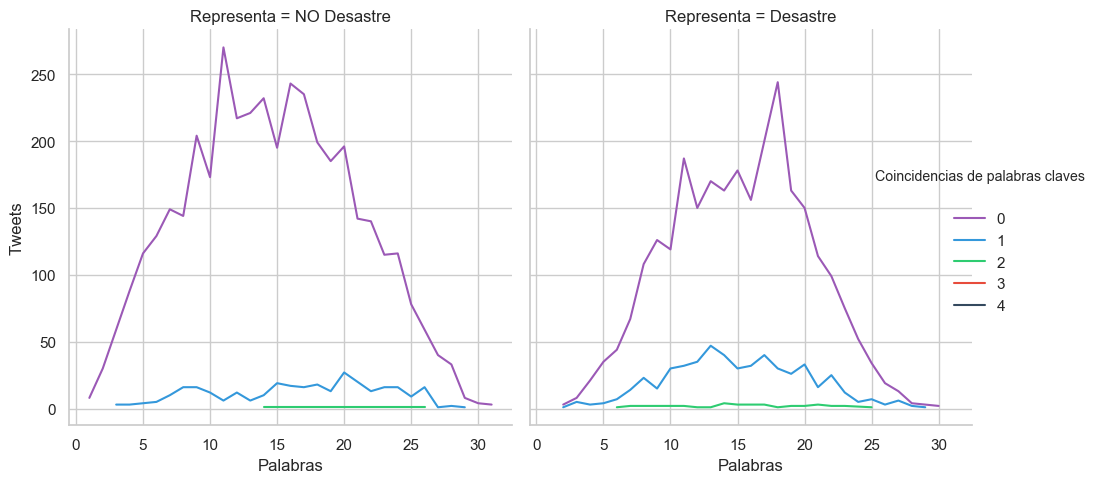

In [59]:
agrupado['Representa'] = "NO Desastre"
agrupado.loc[agrupado['target'] == 1, 'Representa'] = "Desastre"

flatui = ["#9b59b6", "#3498db", "#2ecc71", "#e74c3c", "#34495e"]
g = sns.relplot(x="totalwords", y="cantidad", col="Representa", palette=flatui,  hue="matches", kind="line", data=agrupado)
g._legend.texts[0].set_text("")
g._legend.set_title("Coincidencias de palabras claves")
g.set(xlabel='Palabras', ylabel='Tweets')

In [60]:
datos['language'] = detect(str(datos['text']))
datos.head()

,id,keyword,location,text,target,counts,totalwords,words,hashtags,matches,language
0,1,NaN,NaN,our deeds are the reason of this #earthquake may allah forgive us all,1,69,13,"[our, deeds, are, the, reason, of, this, #earthquake, may, allah, forgive, us, all]",#earthquake,0,en
1,4,NaN,NaN,forest fire near la ronge sask. canada,1,38,7,"[forest, fire, near, la, ronge, sask., canada]",,1,en
2,5,NaN,NaN,all residents asked to 'shelter in place' are being notified by officers. no other evacuation or shelter in place orders are expected,1,133,22,"[all, residents, asked, to, 'shelter, in, place', are, being, notified, by, officers., no, other, evacuation, or, shelter, in, place, orders, are, expected]",,1,en
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in california",1,65,8,"[13,000, people, receive, #wildfires, evacuation, orders, in, california]",#wildfires,1,en
4,7,NaN,NaN,just got sent this photo from ruby #alaska as smoke from #wildfires pours into a school,1,88,16,"[just, got, sent, this, photo, from, ruby, #alaska, as, smoke, from, #wildfires, pours, into, a, school]",#alaska #wildfires,0,en


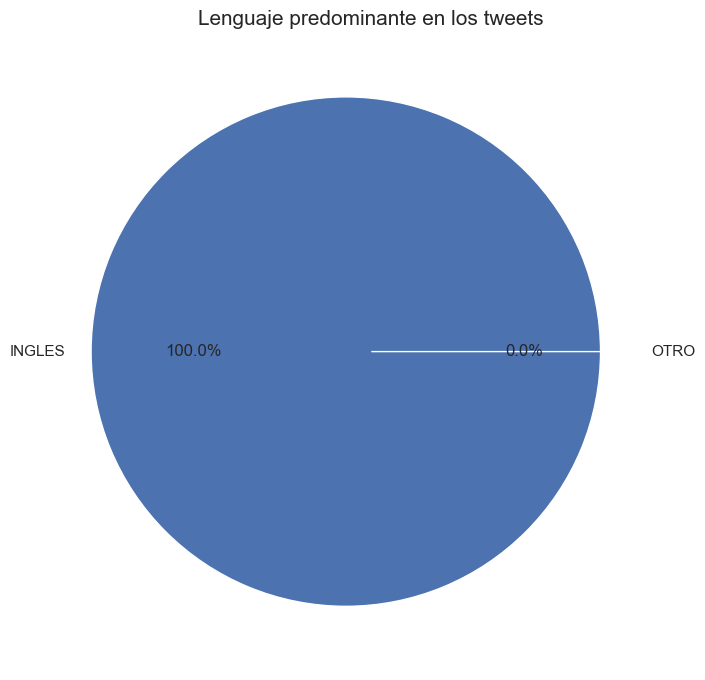

In [72]:
#Obtenemos las cantidades de propiedades con gimnasio
engSI = (datos[datos['language'] == 'en']).language.count()
engNO = (datos[datos['language'] != 'en']).language.count()
sizes = [engSI, engNO]
nombres = ['INGLES','OTRO']
# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))
plt.title('Lenguaje predominante en los tweets', fontsize=15)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', shadow=False, explode=(0.1, 0))
plt.show()

In [61]:
target1 = datos.loc[(datos['target'] == 1) & (datos['keyword'].notnull())]
target0 = datos.loc[(datos['target'] == 0) & (datos['keyword'].notnull())]

In [62]:
target1.head()

,id,keyword,location,text,target,counts,totalwords,words,hashtags,matches,language
31,48,ablaze,Birmingham,@bbcmtd wholesale markets ablaze http://t.co/lhyxeohy6c,1,55,5,"[@bbcmtd, wholesale, markets, ablaze, http://t.co/lhyxeohy6c]",,0,en
33,50,ablaze,AFRICA,#africanbaze: breaking news:nigeria flag set ablaze in aba. http://t.co/2nndbgwyei,1,82,9,"[#africanbaze:, breaking, news:nigeria, flag, set, ablaze, in, aba., http://t.co/2nndbgwyei]",#africanbaze:,0,en
37,55,ablaze,World Wide!!,inec office in abia set ablaze - http://t.co/3imaomknna,1,55,8,"[inec, office, in, abia, set, ablaze, -, http://t.co/3imaomknna]",,0,en
38,56,ablaze,NaN,barbados #bridgetown jamaica ûò two cars set ablaze: santa cruz ûó head of the st elizabeth police superintende... http://t.co/wdueaj8q4j,1,140,19,"[barbados, #bridgetown, jamaica, ûò, two, cars, set, ablaze:, santa, cruz, ûó, head, of, the, st, elizabeth, police, superintende..., http://t.co/wdueaj8q4j]",#bridgetown,0,en
46,66,ablaze,"GREENSBORO,NORTH CAROLINA",how the west was burned: thousands of wildfires ablaze in california alone http://t.co/vl5tbr3wbr,1,97,13,"[how, the, west, was, burned:, thousands, of, wildfires, ablaze, in, california, alone, http://t.co/vl5tbr3wbr]",,1,en


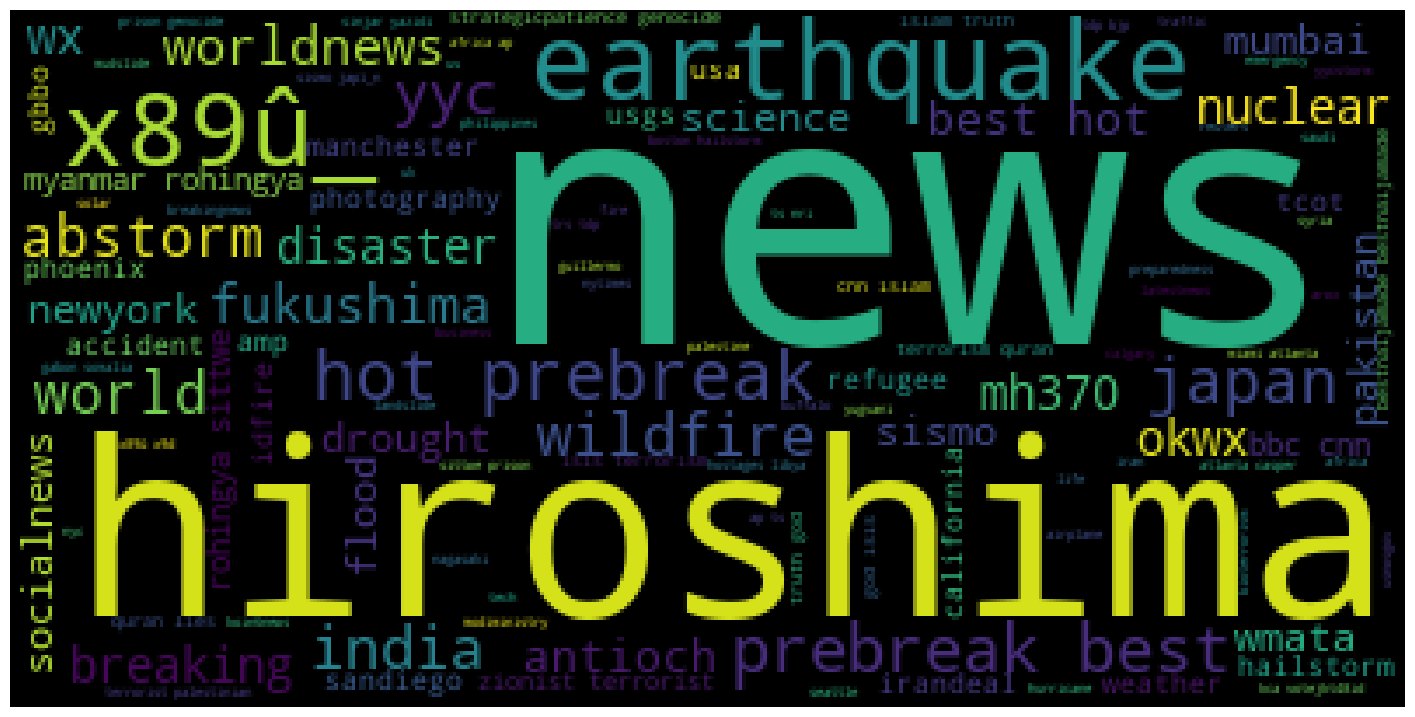

In [63]:
wordcloud = WordCloud().generate(str(target1.hashtags.values).replace("'", "").replace(" ",""))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [64]:
target0.head()

,id,keyword,location,text,target,counts,totalwords,words,hashtags,matches,language
32,49,ablaze,Est. September 2012 - Bristol,we always try to bring the heavy. #metal #rt http://t.co/yao1e0xngw,0,67,10,"[we, always, try, to, bring, the, heavy., #metal, #rt, http://t.co/yao1e0xngw]",#metal #rt,0,en
34,52,ablaze,"Philadelphia, PA",crying out for more! set me ablaze,0,34,7,"[crying, out, for, more!, set, me, ablaze]",,0,en
35,53,ablaze,"London, UK",on plus side look at the sky last night it was ablaze http://t.co/qqsmshaj3n,0,76,13,"[on, plus, side, look, at, the, sky, last, night, it, was, ablaze, http://t.co/qqsmshaj3n]",,0,en
36,54,ablaze,Pretoria,@phdsquares #mufc they've built so much hype around new acquisitions but i doubt they will set the epl ablaze this season.,0,122,21,"[@phdsquares, #mufc, they've, built, so, much, hype, around, new, acquisitions, but, i, doubt, they, will, set, the, epl, ablaze, this, season.]",#mufc,0,en
39,57,ablaze,Paranaque City,ablaze for you lord :d,0,22,5,"[ablaze, for, you, lord, :d]",,0,en


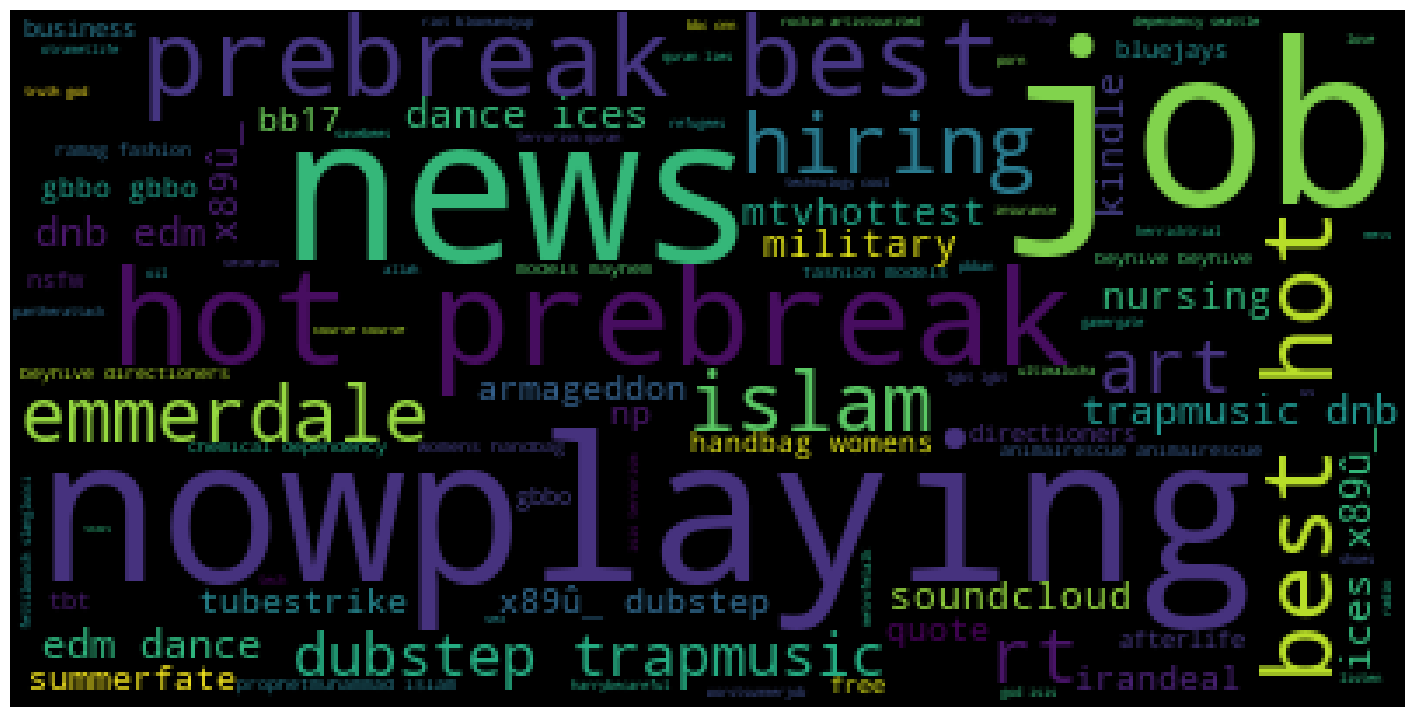

In [65]:
wordcloud = WordCloud().generate(str(target0.hashtags.values).replace("'", "").replace(" ",""))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()